In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer

In [2]:
insurance_data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance_data.shape

(1338, 7)

In [4]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance_data['age_bins'] = pd.cut(x=insurance_data['age'], bins=[0,9,19, 29, 39, 49, 59,69,79,89,99])

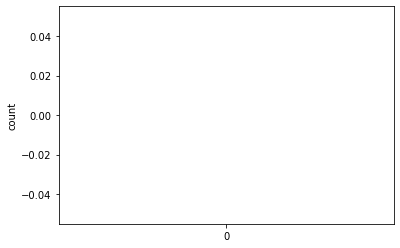

In [6]:
sns.countplot()

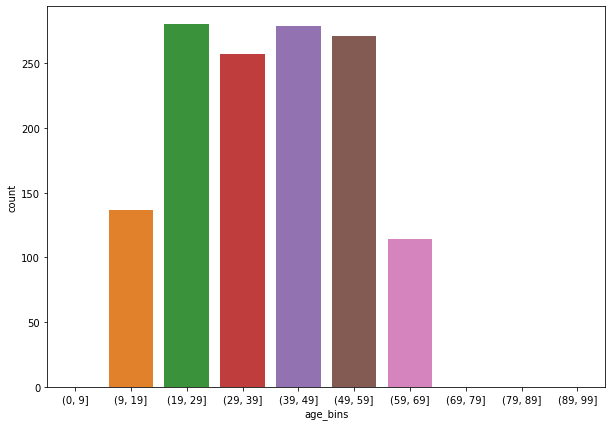

In [7]:
plt.figure(figsize=(10,7))
sns.countplot(x=insurance_data["age_bins"])

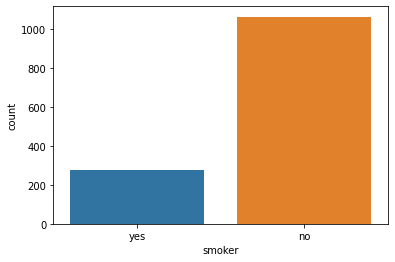

In [8]:
sns.countplot(x=insurance_data.smoker)

## Preprocessing our dataframe

In [9]:
insurance_data["children"] = insurance_data["children"].astype("category")

In [10]:
insurance_one_hot = pd.get_dummies(insurance_data)

In [11]:
insurance_one_hot.head(5)

,age,bmi,charges,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,...,"age_bins_(0, 9]","age_bins_(9, 19]","age_bins_(19, 29]","age_bins_(29, 39]","age_bins_(39, 49]","age_bins_(49, 59]","age_bins_(59, 69]","age_bins_(69, 79]","age_bins_(79, 89]","age_bins_(89, 99]"
0,19,27.900,16884.92400,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,18,33.770,1725.55230,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,28,33.000,4449.46200,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,33,22.705,21984.47061,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,32,28.880,3866.85520,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [12]:
X = insurance_one_hot.drop("charges",axis=1)
y = insurance_one_hot.charges

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
X_train = tf.constant(X_train)
X_test = tf.constant(X_test)
y_train = tf.constant(y_train)
y_test = tf.constant(y_test)

In [15]:
def evaluate_metrics(y_true,y_preds):
  mae,rmse = tf.metrics.mean_absolute_error(y_true,tf.squeeze(y_preds)).numpy(),np.sqrt(tf.metrics.mean_absolute_error(y_true,tf.squeeze(y_preds)).numpy())
  return mae,rmse

In [16]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
                            tf.keras.layers.Dense(100,activation="relu"),
                             tf.keras.layers.Dense(1)])
model_1.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])
model_1.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 6s 4ms/step - loss: 8679.5781 - mae: 8679.5781
Epoch 2/100
34/34 [==============================] - 0s 6ms/step - loss: 7866.8506 - mae: 7866.8506
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 7607.0532 - mae: 7607.0532
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 7548.1318 - mae: 7548.1318
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 7791.0176 - mae: 7791.0176
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 7596.2939 - mae: 7596.2939
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 7591.0132 - mae: 7591.0132
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7796.0576 - mae: 7796.0576
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 7518.4292 - mae: 7518.4292
Epoch 10/100
34/34 [==============================] - 0s 7ms/step - loss: 7659.7109 - mae: 7659.7109

In [17]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2700      
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 2,801
Trainable params: 2,801
Non-trainable params: 0
_________________________________________________________________


In [18]:
y_preds = model_1.predict(X_test)
mae = tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_preds)).numpy()
mae

7049.433

In [19]:
rmse = np.sqrt(tf.metrics.mean_squared_error(y_test,tf.squeeze(y_preds)).numpy())
rmse

10597.91

In [20]:
model_2 = tf.keras.Sequential([
                                tf.keras.layers.Dense(100,activation="relu"),
                                tf.keras.layers.Dense(100,activation='relu'),
                                tf.keras.layers.Dense(1)
                                    ])
model_2.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["mae"])
model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 11427.0078 - mae: 11427.0078
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7544.7437 - mae: 7544.7437
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 7240.5811 - mae: 7240.5811
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 6953.7285 - mae: 6953.7285
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 6670.5796 - mae: 6670.5796
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 6367.8882 - mae: 6367.8882
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 6202.2939 - mae: 6202.2939
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 6014.3516 - mae: 6014.3516
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 5765.6660 - mae: 5765.6660
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 5501.1396 - mae: 5501.13

In [21]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               2700      
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 12,901
Trainable params: 12,901
Non-trainable params: 0
_________________________________________________________________


In [22]:
y_preds = model_2.predict(X_test)
mae = tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_preds)).numpy()
mae

1978.1368

In [23]:
rmse = np.sqrt(tf.metrics.mean_squared_error(y_test,tf.squeeze(y_preds)).numpy())
rmse

4824.392

In [24]:
model_3 = tf.keras.Sequential([
                                tf.keras.layers.Dense(80,activation="relu"),
                                tf.keras.layers.Dense(80,activation='relu'),
                                tf.keras.layers.Dense(1)
                                    ])
model_3.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["mae"])
model_3.fit(X_train,y_train,epochs=500)

Epoch 1/500
34/34 [==============================] - 0s 3ms/step - loss: 11745.1680 - mae: 11745.1680
Epoch 2/500
34/34 [==============================] - 0s 2ms/step - loss: 7531.6602 - mae: 7531.6602
Epoch 3/500
34/34 [==============================] - 0s 2ms/step - loss: 7247.7319 - mae: 7247.7319
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 6986.4888 - mae: 6986.4888
Epoch 5/500
34/34 [==============================] - 0s 2ms/step - loss: 6723.5244 - mae: 6723.5244
Epoch 6/500
34/34 [==============================] - 0s 2ms/step - loss: 6421.0415 - mae: 6421.0415
Epoch 7/500
34/34 [==============================] - 0s 3ms/step - loss: 6262.8931 - mae: 6262.8931
Epoch 8/500
34/34 [==============================] - 0s 2ms/step - loss: 6099.7339 - mae: 6099.7339
Epoch 9/500
34/34 [==============================] - 0s 3ms/step - loss: 5885.7451 - mae: 5885.7451
Epoch 10/500
34/34 [==============================] - 0s 2ms/step - loss: 5666.6777 - mae: 5666.67

In [25]:
y_preds = model_3.predict(X_test)
mae = tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_preds)).numpy()
mae

1418.9146

In [26]:
rmse = np.sqrt(tf.metrics.mean_squared_error(y_test,tf.squeeze(y_preds)).numpy())
rmse

4422.9834

In [27]:
model_4 = tf.keras.Sequential([
                                tf.keras.layers.Dense(80,activation="relu"),
                                tf.keras.layers.Dense(80,activation='relu'),
                                tf.keras.layers.Dense(80,activation='relu'),
                                tf.keras.layers.Dense(1)
                                    ])
model_4.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),metrics=["mae"])
model_4.fit(X_train,y_train,epochs=1000)

Epoch 1/1000
34/34 [==============================] - 0s 3ms/step - loss: 8828.3691 - mae: 8828.3691
Epoch 2/1000
34/34 [==============================] - 0s 3ms/step - loss: 6717.6680 - mae: 6717.6680
Epoch 3/1000
34/34 [==============================] - 0s 3ms/step - loss: 6169.5293 - mae: 6169.5293
Epoch 4/1000
34/34 [==============================] - 0s 3ms/step - loss: 5514.0005 - mae: 5514.0005
Epoch 5/1000
34/34 [==============================] - 0s 3ms/step - loss: 4014.8845 - mae: 4014.8845
Epoch 6/1000
34/34 [==============================] - 0s 3ms/step - loss: 3749.4653 - mae: 3749.4653
Epoch 7/1000
34/34 [==============================] - 0s 2ms/step - loss: 3321.7163 - mae: 3321.7163
Epoch 8/1000
34/34 [==============================] - 0s 3ms/step - loss: 2964.9368 - mae: 2964.9368
Epoch 9/1000
34/34 [==============================] - 0s 3ms/step - loss: 2892.4358 - mae: 2892.4358
Epoch 10/1000
34/34 [==============================] - 0s 3ms/step - loss: 2866.6169 - mae:

In [28]:
y_preds = model_4.predict(X_test)
mae = tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_preds)).numpy()
mae

1707.7102

In [29]:
model_1_preds = model_1.predict(X_test)
mae_1,rmse_1 =  evaluate_metrics(y_test,model_1_preds)

In [30]:
model_2_preds = model_2.predict(X_test)
mae_2,rmse_2 =  evaluate_metrics(y_test,model_2_preds)

In [31]:
model_3_preds = model_3.predict(X_test)
mae_3,rmse_3 =  evaluate_metrics(y_test,model_3_preds)

In [32]:
model_4_preds = model_4.predict(X_test)
mae_4,rmse_4 =  evaluate_metrics(y_test,model_4_preds)

In [33]:
results = [ ["model_1",mae_1,rmse_1],
           ["model_2",mae_2,rmse_2],
           ["model_3",mae_3,rmse_3],
           ["model_4",mae_4,rmse_4]]

In [34]:
results_df = pd.DataFrame(results,columns=["Model","MAE","RMSE"])
results_df

,Model,MAE,RMSE
0,model_1,7049.433105,83.960899
1,model_2,1978.136841,44.476250
2,model_3,1418.914551,37.668484
3,model_4,1707.710205,41.324451


In [35]:
model_3.save("best_model_sequential.h5")

In [36]:
loaded_model = tf.keras.models.load_model("best_model_sequential.h5")

In [37]:
loaded_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 80)                2160      
                                                                 
 dense_6 (Dense)             (None, 80)                6480      
                                                                 
 dense_7 (Dense)             (None, 1)                 81        
                                                                 
Total params: 8,721
Trainable params: 8,721
Non-trainable params: 0
_________________________________________________________________


In [38]:
history = loaded_model.fit(X_train,y_train,epochs=500)

Epoch 1/500
34/34 [==============================] - 0s 3ms/step - loss: 1556.2540 - mae: 1556.2540
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 1568.8269 - mae: 1568.8269
Epoch 3/500
34/34 [==============================] - 0s 2ms/step - loss: 1574.6326 - mae: 1574.6326
Epoch 4/500
34/34 [==============================] - 0s 2ms/step - loss: 1518.8629 - mae: 1518.8629
Epoch 5/500
34/34 [==============================] - 0s 3ms/step - loss: 1528.6202 - mae: 1528.6202
Epoch 6/500
34/34 [==============================] - 0s 2ms/step - loss: 1554.9011 - mae: 1554.9011
Epoch 7/500
34/34 [==============================] - 0s 3ms/step - loss: 1530.1154 - mae: 1530.1154
Epoch 8/500
34/34 [==============================] - 0s 3ms/step - loss: 1569.2920 - mae: 1569.2920
Epoch 9/500
34/34 [==============================] - 0s 3ms/step - loss: 1519.3992 - mae: 1519.3992
Epoch 10/500
34/34 [==============================] - 0s 2ms/step - loss: 1527.6123 - mae: 1527.6123

<Figure size 1440x1080 with 0 Axes>

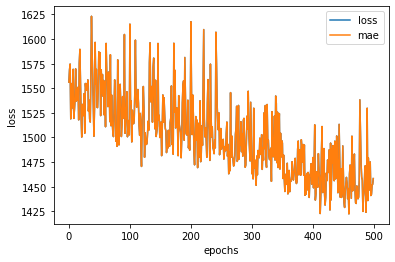

In [39]:
plt.figure(figsize=(20,15))
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

## Scaling our dataset
* MinMaxScaler(Neural networks tend to prefer normalization)
* StandardScaler(This reduces the effect of outliers)

In [3]:
insurance_data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

In [5]:
X = insurance_data.drop("charges",axis=1)
y = insurance_data.charges
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
len(X_train),len(X_test),len(y_train),len(y_test)

(1070, 268, 1070, 268)

In [6]:
ct.fit(X_train)
X_train_transformed = ct.transform(X_train)
X_test_transformed = ct.transform(X_test)

In [7]:
X_train_transformed.shape, X_test.shape

((1070, 11), (268, 6))

In [8]:
model_5 = tf.keras.Sequential([
                                tf.keras.layers.Dense(100,activation="relu"),
                                tf.keras.layers.Dense(100,activation='relu'),
                                tf.keras.layers.Dense(1)
                                    ])
model_5.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),metrics=["mae"])
model_5.fit(X_train_transformed,y_train,epochs=500)

Epoch 1/500
34/34 [==============================] - 5s 5ms/step - loss: 11527.6973 - mae: 11527.6973
Epoch 2/500
34/34 [==============================] - 0s 6ms/step - loss: 7490.6475 - mae: 7490.6475
Epoch 3/500
34/34 [==============================] - 0s 4ms/step - loss: 5379.9551 - mae: 5379.9551
Epoch 4/500
34/34 [==============================] - 0s 6ms/step - loss: 3661.6694 - mae: 3661.6694
Epoch 5/500
34/34 [==============================] - 0s 5ms/step - loss: 3381.6472 - mae: 3381.6472
Epoch 6/500
34/34 [==============================] - 0s 4ms/step - loss: 3304.3127 - mae: 3304.3127
Epoch 7/500
34/34 [==============================] - 0s 3ms/step - loss: 3361.2751 - mae: 3361.2751
Epoch 8/500
34/34 [==============================] - 0s 4ms/step - loss: 3231.8474 - mae: 3231.8474
Epoch 9/500
34/34 [==============================] - 0s 4ms/step - loss: 3237.2344 - mae: 3237.2344
Epoch 10/500
34/34 [==============================] - 0s 4ms/step - loss: 3273.1262 - mae: 3273.12

In [9]:
model_5.evaluate(X_test_transformed,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 1856.9373 - mae: 1856.9373


[1856.937255859375, 1856.937255859375]

In [10]:
insurance_data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
insurance_data['age_bins'] = pd.cut(x=insurance_data['age'], bins=[0,9,19, 29, 39, 49, 59,69,79,89,99])

In [12]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges,age_bins
0,19,female,27.900,0,yes,southwest,16884.92400,"(9, 19]"
1,18,male,33.770,1,no,southeast,1725.55230,"(9, 19]"
2,28,male,33.000,3,no,southeast,4449.46200,"(19, 29]"
3,33,male,22.705,0,no,northwest,21984.47061,"(29, 39]"
4,32,male,28.880,0,no,northwest,3866.85520,"(29, 39]"


In [13]:
insurance_data.drop("age",axis=1,inplace=True)

In [14]:
ct = make_column_transformer(
    (MinMaxScaler(),["bmi"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","children","smoker","region","age_bins"])
)

In [16]:
X = insurance_data.drop("charges",axis=1)
y = insurance_data["charges"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [17]:
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(), ['bmi']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'children', 'smoker', 'region',
                                  'age_bins'])])

In [19]:
X_train_transformed = ct.transform(X_train)
X_test_transformed = ct.transform(X_test)

In [21]:
X_train_transformed.shape, X_test_transformed.shape

((1070, 21), (268, 21))

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
forest_model = RandomForestRegressor()

In [28]:
forest_model.fit(X_train_transformed,y_train)

RandomForestRegressor()

In [32]:
y_preds = forest_model.predict(X_test_transformed)

In [33]:
from sklearn.metrics import mean_absolute_error

In [34]:
mean_absolute_error(y_test,y_preds)

2606.669339079074